Source:  
https://archive.ics.uci.edu/dataset/571/hcv+data

Features:  
ID Patient (Index)  

Category (Target)  : 0=Blood Donor  |  0s=suspect Blood Donor  | 1=Hepatitis  | 2=Fibrosis  | 3=Cirrhosis  

Age  

Sex  

ALB - Albumin: Albumin is a protein produced by the liver. Its levels in the blood can indicate liver function and overall health. Abnormal levels may suggest liver disease or other conditions.  

ALP - Alkaline Phosphatase: Alkaline phosphatase is an enzyme found in various tissues throughout the body, including the liver, bones, and bile ducts. Elevated levels may indicate liver or bone disorders.  

AST - Aspartate Aminotransferase: AST is an enzyme found in the liver, heart, muscles, and other tissues. Elevated levels may suggest liver damage or heart muscle injury.  

BIL - Bilirubin: Bilirubin is a yellowish pigment produced during the breakdown of red blood cells. Elevated levels may indicate liver disease or certain blood disorders.  

CHE - Cholinesterase: Cholinesterase is an enzyme primarily produced by the liver. Its levels can indicate liver function and may be affected by certain medications or liver diseases.  

CHOL - Cholesterol: Cholesterol is a fatty substance found in the blood. High levels of cholesterol can increase the risk of heart disease and other cardiovascular problems.  

CREA - Creatinine: Creatinine is a waste product generated by muscle metabolism. Its levels in the blood can indicate kidney function. Abnormal levels may suggest kidney disease or other conditions affecting kidney function.  

GGT - A gamma-glutamyl transferase test measures the amount of GGT in the blood. GGT is an enzyme found throughout the body, but it is mostly found in the liver. When the liver is damaged, GGT may leak into the bloodstream. High levels of GGT in the blood may be a sign of liver disease or damage to the bile ducts. Bile ducts are tubes that carry bile in and out of the liver. Bile is a fluid made by the liver. It is important for digestion.  

PROT - (Protein) refers to the total protein concentration measured in the blood of the patients. It is an important clinical marker used to assess the health and function of various organs, especially the liver, and to diagnose a range of medical conditions.  

## Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv(filepath_or_buffer="hcvdat0.csv", index_col=[0])
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [4]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [5]:
data.shape

(615, 13)

In [6]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

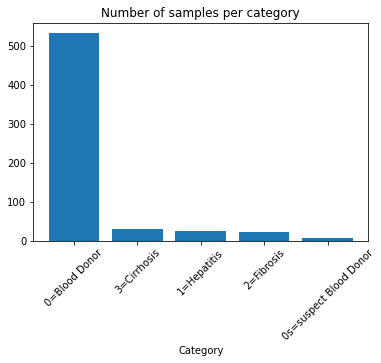

In [124]:
# Number of samples per Category
data_occurences = data.groupby("Category").size().reset_index().sort_values(by=0, ascending=False)
data_occ_df = pd.DataFrame(data_occurences)
plt.bar(data_occurences["Category"], data_occurences[0])
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.title('Number of samples per category')
plt.show()

In [9]:
# Find unique values for each column
len_unique = {}
for col in data.columns:
    len_unique[col]=len(data[col].unique())
len_unique

{'Category': 5,
 'Age': 49,
 'Sex': 2,
 'ALB': 190,
 'ALP': 415,
 'ALT': 342,
 'AST': 297,
 'BIL': 188,
 'CHE': 407,
 'CHOL': 314,
 'CREA': 117,
 'GGT': 358,
 'PROT': 199}

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ALB'}>,
        <AxesSubplot:title={'center':'ALP'}>],
       [<AxesSubplot:title={'center':'ALT'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'BIL'}>],
       [<AxesSubplot:title={'center':'CHE'}>,
        <AxesSubplot:title={'center':'CHOL'}>,
        <AxesSubplot:title={'center':'CREA'}>],
       [<AxesSubplot:title={'center':'GGT'}>,
        <AxesSubplot:title={'center':'PROT'}>, <AxesSubplot:>]],
      dtype=object)

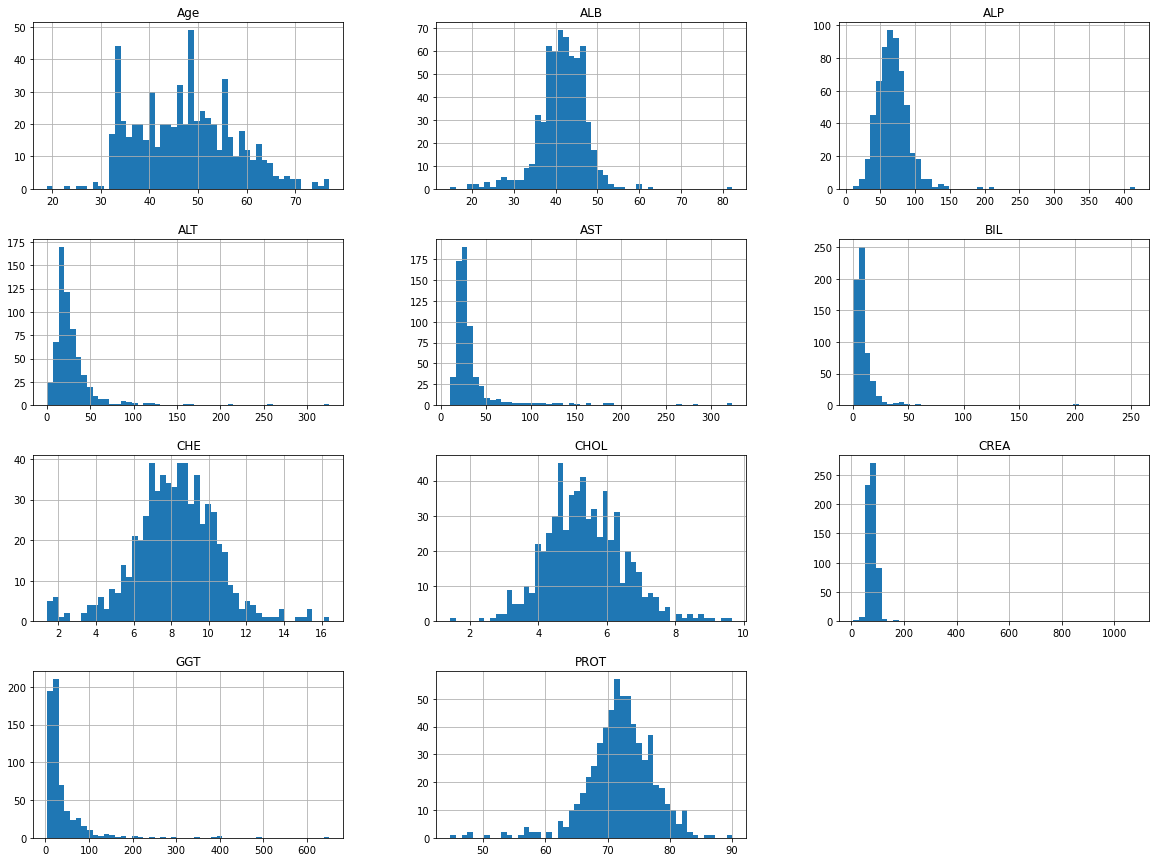

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))

In [11]:
data[data.ALB.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.5,NaN,70.0,107.0,79.0


In [12]:
data[data.ALP.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
547,1=Hepatitis,30,m,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
569,2=Fibrosis,49,m,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
570,2=Fibrosis,49,m,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
571,2=Fibrosis,50,m,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
572,2=Fibrosis,53,m,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
577,2=Fibrosis,71,m,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
582,2=Fibrosis,49,f,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
583,2=Fibrosis,51,f,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


In [13]:
data[data.ALT.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0


In [14]:
data[data.CHOL.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
122,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
320,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
434,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
499,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
585,2=Fibrosis,75,f,36.0,NaN,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0
591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN
604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0


In [15]:
data[data.PROT.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN


In [16]:
# Correlation between feature before the split
# data_filled = data.fillna(data.mean())
# correlation_matrix_before_split = data_filled.corr()
# print("Correlation Matrix Before Splitting:\n", correlation_matrix_before_split)

In [17]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix_before_split, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Before Splitting')
# plt.show()

We observe that there is a correlation between the following: (PROT, ALB), (ALP, GGT), (AST, GGT), (CHOL, CHE)

In [18]:
print("Percentage of male: {:.2f}%".format(len(data[data.Sex=='m'])/len(data)*100), "| Percentage of female: {:.2f}%".format(len(data[data.Sex=='f'])/len(data)*100))

Percentage of male: 61.30% | Percentage of female: 38.70%


[Text(0, 0, 'Age'),
 Text(1, 0, 'ALB'),
 Text(2, 0, 'ALP'),
 Text(3, 0, 'ALT'),
 Text(4, 0, 'AST'),
 Text(5, 0, 'BIL'),
 Text(6, 0, 'CHE'),
 Text(7, 0, 'CHOL'),
 Text(8, 0, 'CREA'),
 Text(9, 0, 'GGT'),
 Text(10, 0, 'PROT')]

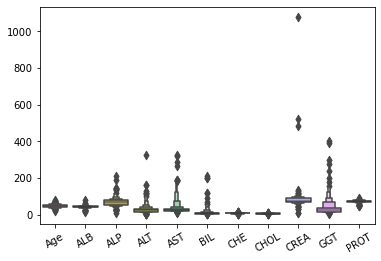

In [34]:
# Check for outliers
ax = sns.boxenplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [121]:
outlier_info=[]
for c in numerical_cols:
    outliers = data[data[c] >= 200]
    for idx, row in outliers.iterrows():
        outlier_info.append((idx, row['Category'], c, row[c]))

# Create a DataFrame from the outlier information
outliers_df = pd.DataFrame(outlier_info, columns=['Index', 'Category', 'Column', 'Value'])

# Display the DataFrame
outliers_df

,Index,Category,Column,Value
0,540,0s=suspect Blood Donor,ALP,208.2
1,611,3=Cirrhosis,ALP,416.6
2,537,0s=suspect Blood Donor,ALT,208.8
3,540,0s=suspect Blood Donor,ALT,325.3
4,571,2=Fibrosis,ALT,258.0
5,559,1=Hepatitis,AST,324.0
6,589,3=Cirrhosis,AST,263.1
7,596,3=Cirrhosis,AST,319.8
8,610,3=Cirrhosis,AST,285.8
9,588,3=Cirrhosis,BIL,200.0


In [131]:
len(outliers_df[outliers_df.Category=='3=Cirrhosis']) / len(data[data.Category=='3=Cirrhosis'])

0.5333333333333333

From the above dataframe, because we have an imbalanced data where most of samples from the original dataset belong to category '0=Blood Donor', we will not delete what seems to be outliers because it constitutes an important amount of data. For instance 53.33% of Cirrhosis ('3=Cirrhosis') related samples looks like outliers (all features combined). It's not relevant to remove this quantity of data.

In [19]:
# Separate the features from the target
y = data['Category']
X = data.drop(['Category'], axis=1)

In [20]:
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [21]:
y.head()

1    0=Blood Donor
2    0=Blood Donor
3    0=Blood Donor
4    0=Blood Donor
5    0=Blood Donor
Name: Category, dtype: object

## Data pre-processing

In [22]:
# Distinguish between Categorical and Numerical data

In [23]:
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
print(categorical_cols)

['Sex']


In [24]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
print(numerical_cols)

['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [25]:
# Preprocessing preparation

In [26]:
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='mean')),    
    ('scale', StandardScaler())
])

In [27]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])
# We could have been using binary_encoding instead of One-Hot-Encoding, 
# but because there are only one categorical column with only 2 values and a dataset 
# with only 615 samples we opted for the OneHotEncoding

In [28]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
transformers = [
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed training data into a dataframe
X_train_processed_df = pd.DataFrame(X_train_processed, columns=numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))
X_train_processed_df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,-0.835559,-0.901069,0.162208,0.027706,-0.257913,-0.280688,-1.157568,-6.395298e-01,-0.080611,-0.322796,-1.056130,0.0,1.0
1,-0.835559,0.726659,-0.254421,-0.320779,-0.346239,1.817927,0.219224,-5.367520e-01,-0.080611,-0.486144,0.667928,0.0,1.0
2,0.591500,0.496654,-0.315969,-0.588518,-0.480152,-0.179486,-0.566162,-3.483261e-01,-0.208413,-0.427632,0.012036,0.0,1.0
3,1.101164,-2.723417,-0.727864,0.478187,1.203739,-0.296667,-1.417786,-1.607354e+00,-0.756136,-0.113126,-3.923313,1.0,0.0
4,-1.447156,0.125108,3.282193,-0.597018,-0.622613,-0.424502,0.039437,7.607084e-16,-0.610077,-0.247217,0.461790,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.937492,-0.317210,-0.235484,1.846631,0.254948,-0.051651,1.302678,1.373202e+00,0.321053,1.278990,0.218173,0.0,1.0
488,-0.631693,0.532040,0.332647,-0.129537,-0.420318,-0.270035,1.037729,-1.007817e+00,-0.135383,-0.295978,0.030776,0.0,1.0
489,1.203097,-0.334903,-0.874631,-0.121038,-0.386128,0.710029,-0.305944,-1.470317e+00,0.083706,-0.417880,-0.006704,0.0,1.0
490,0.081836,0.478961,-0.727864,-0.503522,-0.329143,-0.365911,0.432130,1.176211e+00,-0.135383,-0.622674,0.218173,1.0,0.0


In [30]:
y_train_numbers = y_train.str.split("=", n=1, expand=True)[0]
y_train_numbers = [4 if n == "0s" else n for n in y_train_numbers]
scalled_y_train = StandardScaler().fit_transform(np.reshape(y_train_numbers, (-1, 1)))
data_processed = X_train_processed_df.copy()
data_processed["Category"] = scalled_y_train
data_processed.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m,Category
0,-0.835559,-0.901069,0.162208,0.027706,-0.257913,-0.280688,-1.157568,-6.395298e-01,-0.080611,-0.322796,-1.056130,0.0,1.0,-0.324523
1,-0.835559,0.726659,-0.254421,-0.320779,-0.346239,1.817927,0.219224,-5.367520e-01,-0.080611,-0.486144,0.667928,0.0,1.0,-0.324523
2,0.591500,0.496654,-0.315969,-0.588518,-0.480152,-0.179486,-0.566162,-3.483261e-01,-0.208413,-0.427632,0.012036,0.0,1.0,-0.324523
3,1.101164,-2.723417,-0.727864,0.478187,1.203739,-0.296667,-1.417786,-1.607354e+00,-0.756136,-0.113126,-3.923313,1.0,0.0,-0.324523
4,-1.447156,0.125108,3.282193,-0.597018,-0.622613,-0.424502,0.039437,7.607084e-16,-0.610077,-0.247217,0.461790,1.0,0.0,-0.324523


In [31]:
X_train_processed_df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,-0.835559,-0.901069,0.162208,0.027706,-0.257913,-0.280688,-1.157568,-6.395298e-01,-0.080611,-0.322796,-1.056130,0.0,1.0
1,-0.835559,0.726659,-0.254421,-0.320779,-0.346239,1.817927,0.219224,-5.367520e-01,-0.080611,-0.486144,0.667928,0.0,1.0
2,0.591500,0.496654,-0.315969,-0.588518,-0.480152,-0.179486,-0.566162,-3.483261e-01,-0.208413,-0.427632,0.012036,0.0,1.0
3,1.101164,-2.723417,-0.727864,0.478187,1.203739,-0.296667,-1.417786,-1.607354e+00,-0.756136,-0.113126,-3.923313,1.0,0.0
4,-1.447156,0.125108,3.282193,-0.597018,-0.622613,-0.424502,0.039437,7.607084e-16,-0.610077,-0.247217,0.461790,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.937492,-0.317210,-0.235484,1.846631,0.254948,-0.051651,1.302678,1.373202e+00,0.321053,1.278990,0.218173,0.0,1.0
488,-0.631693,0.532040,0.332647,-0.129537,-0.420318,-0.270035,1.037729,-1.007817e+00,-0.135383,-0.295978,0.030776,0.0,1.0
489,1.203097,-0.334903,-0.874631,-0.121038,-0.386128,0.710029,-0.305944,-1.470317e+00,0.083706,-0.417880,-0.006704,0.0,1.0
490,0.081836,0.478961,-0.727864,-0.503522,-0.329143,-0.365911,0.432130,1.176211e+00,-0.135383,-0.622674,0.218173,1.0,0.0


In [32]:
# Calculate the correlation matrix on the processed training data
correlation_matrix_after_preprocessing = data_processed.corr()
print("Correlation Matrix After Preprocessing (Training Data):\n", correlation_matrix_after_preprocessing)
correlation_matrix_after_preprocessing.style.background_gradient(cmap='coolwarm')
# Visualize the correlation matrix for training data after split
# sns.heatmap(correlation_matrix_after_preprocessing, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix After Preprocessing (Training Data)')
# plt.show()

Correlation Matrix After Preprocessing (Training Data):
                Age       ALB       ALP       ALT       AST       BIL  \
Age       1.000000 -0.199775  0.127874 -0.016273  0.073680  0.038073   
ALB      -0.199775  1.000000 -0.103931 -0.002524 -0.198515 -0.190702   
ALP       0.127874 -0.103931  1.000000  0.231388  0.007676  0.019561   
ALT      -0.016273 -0.002524  0.231388  1.000000  0.232347 -0.086728   
AST       0.073680 -0.198515  0.007676  0.232347  1.000000  0.302727   
BIL       0.038073 -0.190702  0.019561 -0.086728  0.302727  1.000000   
CHE      -0.055278  0.330547  0.091467  0.142950 -0.237370 -0.350162   
CHOL      0.144243  0.206447  0.117692  0.046198 -0.235556 -0.191654   
CREA     -0.023037 -0.009998  0.201258 -0.065135 -0.020808  0.022775   
GGT       0.088927 -0.113824  0.281374  0.369106  0.558470  0.240706   
PROT     -0.167890  0.557083 -0.052467  0.047730  0.029232 -0.062676   
Sex_f     0.041517 -0.141674  0.018044 -0.151040 -0.140701 -0.137080   
Sex_m  

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m,Category
Age,1.000000,-0.199775,0.127874,-0.016273,0.073680,0.038073,-0.055278,0.144243,-0.023037,0.088927,-0.167890,0.041517,-0.041517,0.118860
ALB,-0.199775,1.000000,-0.103931,-0.002524,-0.198515,-0.190702,0.330547,0.206447,-0.009998,-0.113824,0.557083,-0.141674,0.141674,-0.412159
ALP,0.127874,-0.103931,1.000000,0.231388,0.007676,0.019561,0.091467,0.117692,0.201258,0.281374,-0.052467,0.018044,-0.018044,0.060385
ALT,-0.016273,-0.002524,0.231388,1.000000,0.232347,-0.086728,0.142950,0.046198,-0.065135,0.369106,0.047730,-0.151040,0.151040,0.162395
AST,0.073680,-0.198515,0.007676,0.232347,1.000000,0.302727,-0.237370,-0.235556,-0.020808,0.558470,0.029232,-0.140701,0.140701,0.626110
BIL,0.038073,-0.190702,0.019561,-0.086728,0.302727,1.000000,-0.350162,-0.191654,0.022775,0.240706,-0.062676,-0.137080,0.137080,0.471330
CHE,-0.055278,0.330547,0.091467,0.142950,-0.237370,-0.350162,1.000000,0.447747,-0.019170,-0.083688,0.301654,-0.136211,0.136211,-0.376351
CHOL,0.144243,0.206447,0.117692,0.046198,-0.235556,-0.191654,0.447747,1.000000,-0.059648,0.000629,0.224471,0.038215,-0.038215,-0.322322
CREA,-0.023037,-0.009998,0.201258,-0.065135,-0.020808,0.022775,-0.019170,-0.059648,1.000000,0.137565,-0.039695,-0.155021,0.155021,0.191496
GGT,0.088927,-0.113824,0.281374,0.369106,0.558470,0.240706,-0.083688,0.000629,0.137565,1.000000,0.038954,-0.178456,0.178456,0.469284


## Applying Models

In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

def find_metrics(y_test: pd.Series, y_pred: pd.Series, labels: np.ndarray):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    
    print(f"accuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}\nf1score: {f1score}")

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix:\n", conf_matrix)
    print("\nConfusion Matrix:\n")
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.xticks(rotation=90)
    plt.title("Logistic Regression")
    plt.show()


In [178]:
# Function to calculate sensitivity with perturbed data
def calculate_sensitivity_with_perturbation(model, X_train, y_train, X_test, y_test, feature_idx, perturbation):
    X_train_perturbed = X_train.copy()
    X_test_perturbed = X_test.copy()
    
    # Add perturbation to the specified feature
    X_train_perturbed[:, feature_idx] += perturbation
    X_test_perturbed[:, feature_idx] += perturbation
    
    #print('X_train ', X_train)
    #print('X_train_perturbed', X_train_perturbed)
    
    # Retrain the model with perturbed data
    model.fit(X_train_perturbed, y_train)
    
    # Make predictions
    y_pred_perturbed = model.predict(X_test_perturbed)
    
    # Calculate sensitivity (recall)
    sensitivity_perturbed = recall_score(y_test, y_pred_perturbed, average='weighted')
    
    print("Sensitivity after perturbation:", sensitivity_perturbed)
    
    return sensitivity_perturbed

### A. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

Grid Search Result:- Accuracy Before = 0.8943089430894309    |    Accuracy After  = 0.8943089430894309

In [37]:
Logmodel = LogisticRegression(C=1,max_iter=100,random_state=1)

# C: A regularization parameter determining the inverse of regularization strength in logistic regression.
# max_iter: Maximum number of iterations taken for the solvers to converge.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

accuracy: 0.8943089430894309
precision: 0.895005807200929
recall: 0.8943089430894309
f1score: 0.8798717057726887

Confusion Matrix:



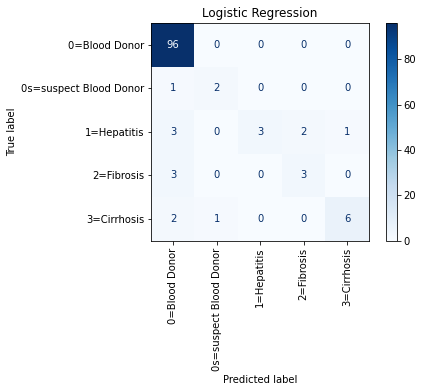

In [138]:
Logmodel.fit(X_train_processed, y_train)
y_pred_Log = Logmodel.predict(X_test_processed)
# Calculate the accuracy
find_metrics(y_test, y_pred_Log, Logmodel.classes_)

In [183]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(Logmodel, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB
Sensitivity after perturbation: 0.8943089430894309
For feature:  ALP
Sensitivity after perturbation: 0.8943089430894309
For feature:  ALT
Sensitivity after perturbation: 0.8943089430894309
For feature:  AST
Sensitivity after perturbation: 0.8943089430894309
For feature:  BIL
Sensitivity after perturbation: 0.8943089430894309
For feature:  CHE
Sensitivity after perturbation: 0.8943089430894309
For feature:  CHOL
Sensitivity after perturbation: 0.8943089430894309
For feature:  CREA
Sensitivity after perturbation: 0.8943089430894309
For feature:  GGT
Sensitivity after perturbation: 0.8943089430894309
For feature:  PROT
Sensitivity after perturbation: 0.8943089430894309


### B. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

Grid Search Results:- Accuracy Before =  0.8617886178861789 | Accuracy After  =  0.8780487804878049

In [40]:
DT_clf = DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=1)

# criterion: A function to measure the quality of a split in decision trees.
# max_depth: The maximum depth of the tree.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

accuracy: 0.8780487804878049
precision: 0.8755003777499634
recall: 0.8780487804878049
f1score: 0.8687665972137107

Confusion Matrix:



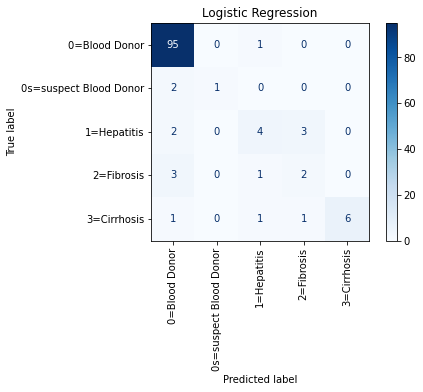

In [41]:
DT_clf.fit(X_train_processed,y_train)
y_pred_DTC = DT_clf.predict(X_test_processed)
find_metrics(y_test, y_pred_DTC, DT_clf.classes_)

In [184]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(DT_clf, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB
Sensitivity after perturbation: 0.8780487804878049
For feature:  ALP
Sensitivity after perturbation: 0.8780487804878049
For feature:  ALT
Sensitivity after perturbation: 0.8780487804878049
For feature:  AST
Sensitivity after perturbation: 0.8780487804878049
For feature:  BIL
Sensitivity after perturbation: 0.8780487804878049
For feature:  CHE
Sensitivity after perturbation: 0.8780487804878049
For feature:  CHOL
Sensitivity after perturbation: 0.8780487804878049
For feature:  CREA
Sensitivity after perturbation: 0.8780487804878049
For feature:  GGT
Sensitivity after perturbation: 0.8780487804878049
For feature:  PROT
Sensitivity after perturbation: 0.8780487804878049


### C. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

Grid Search Results:- Accuracy Before =  0.8536585365853658 | Accuracy After  =  0.8617886178861789

In [43]:
RF_clf = RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators=400,random_state=1)  

# criterion: A function to measure the quality of a split in decision trees.
# max_depth: The maximum depth of the tree.
# random_state: Controls the randomness of the algorithm to produce reproducible results.
# n_estimators: The number of trees in the forest.


accuracy: 0.8617886178861789
precision: 0.8294880246099758
recall: 0.8617886178861789
f1score: 0.828537763638506

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


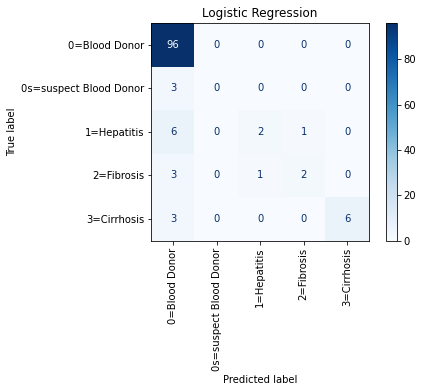

In [44]:
RF_clf.fit(X_train_processed, y_train)
y_pred_RF = RF_clf.predict(X_test_processed)
find_metrics(y_test, y_pred_RF, RF_clf.classes_)

In [190]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(RF_clf, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB
Sensitivity after perturbation: 0.8617886178861789
For feature:  ALP
Sensitivity after perturbation: 0.8617886178861789
For feature:  ALT
Sensitivity after perturbation: 0.8617886178861789
For feature:  AST
Sensitivity after perturbation: 0.8617886178861789
For feature:  BIL
Sensitivity after perturbation: 0.8617886178861789
For feature:  CHE
Sensitivity after perturbation: 0.8617886178861789
For feature:  CHOL
Sensitivity after perturbation: 0.8617886178861789
For feature:  CREA
Sensitivity after perturbation: 0.8617886178861789
For feature:  GGT
Sensitivity after perturbation: 0.8617886178861789
For feature:  PROT
Sensitivity after perturbation: 0.8617886178861789


### D. Stochastic Gradient Descent (SGD)

In [45]:
from sklearn.linear_model import SGDClassifier

Grid Search Results:- Accuracy Before =  0.8699186991869918 | Accuracy After  =  0.8699186991869918

In [46]:
SGD_model = SGDClassifier(alpha=0.001, loss='perceptron',random_state=1)

# alpha: The constant that multiplies the regularization term. Higher values specify stronger regularization.
# loss: The loss function to be used. It defines the objective function to optimize during the training.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

accuracy: 0.8699186991869918
precision: 0.8653141858521389
recall: 0.8699186991869918
f1score: 0.8531181742283508

Confusion Matrix:



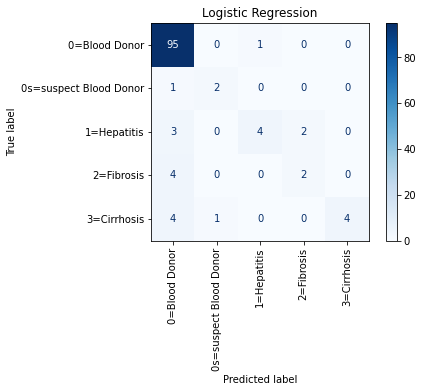

In [47]:
SGD_model.fit(X_train_processed, y_train)
y_pred_SGD = SGD_model.predict(X_test_processed)
find_metrics(y_test, y_pred_SGD, SGD_model.classes_)

In [189]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(SGD_model, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB
Sensitivity after perturbation: 0.8617886178861789
For feature:  ALP
Sensitivity after perturbation: 0.8617886178861789
For feature:  ALT
Sensitivity after perturbation: 0.8536585365853658
For feature:  AST
Sensitivity after perturbation: 0.8699186991869918
For feature:  BIL
Sensitivity after perturbation: 0.8861788617886179
For feature:  CHE
Sensitivity after perturbation: 0.8861788617886179
For feature:  CHOL
Sensitivity after perturbation: 0.8780487804878049
For feature:  CREA
Sensitivity after perturbation: 0.8617886178861789
For feature:  GGT
Sensitivity after perturbation: 0.8699186991869918
For feature:  PROT
Sensitivity after perturbation: 0.8617886178861789


For SGD, there is an improvement in sensitivity when altering values related to (BIL, CHE, CHOL), however there is a decline when altering (ALP)

### E. Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVC

Grid Search Results:- Accuracy Before =  0.8130081300813008 | Accuracy After  =  0.8699186991869918

In [49]:
SVC_model = SVC(C=10,gamma=0.01,random_state=1) 

# C: regularization parameter
# Gamma: kernel coeff.,the ‘spread’ of the kernel/decision region.  
# When gamma is low, the ‘curve’ of the decision boundary.
# is very low and thus the decision region is very broad.


accuracy: 0.8699186991869918
precision: 0.8843205574912892
recall: 0.8699186991869918
f1score: 0.8543780936937108

Confusion Matrix:



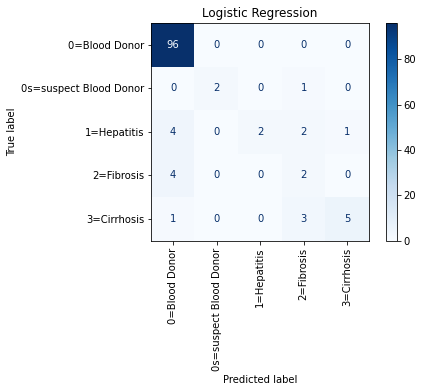

In [50]:
SVC_model.fit(X_train_processed,y_train)
y_pred_SVC = SVC_model.predict(X_test_processed)
find_metrics(y_test, y_pred_SVC, SVC_model.classes_)

In [188]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(SVC_model, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB
Sensitivity after perturbation: 0.8699186991869918
For feature:  ALP
Sensitivity after perturbation: 0.8699186991869918
For feature:  ALT
Sensitivity after perturbation: 0.8699186991869918
For feature:  AST
Sensitivity after perturbation: 0.8699186991869918
For feature:  BIL
Sensitivity after perturbation: 0.8699186991869918
For feature:  CHE
Sensitivity after perturbation: 0.8699186991869918
For feature:  CHOL
Sensitivity after perturbation: 0.8699186991869918
For feature:  CREA
Sensitivity after perturbation: 0.8699186991869918
For feature:  GGT
Sensitivity after perturbation: 0.8699186991869918
For feature:  PROT
Sensitivity after perturbation: 0.8699186991869918


## GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV 

### A. Logistic Regression GridSearchCV

In [52]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200, 500],'penalty': ['l1', 'l2']}
grid_log = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid_log.fit(X_train_processed,y_train)

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l1', 'l2']})

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=50)
accuracy: 0.8943089430894309
precision: 0.895005807200929
recall: 0.8943089430894309
f1score: 0.8798717057726887

Confusion Matrix:



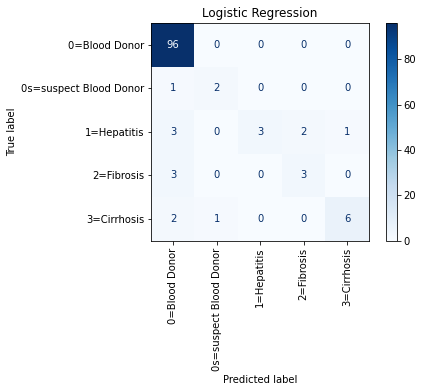

In [53]:
print(grid_log.best_params_)
print(grid_log.best_estimator_)
grid_log_predictions = grid_log.predict(X_test_processed)
find_metrics(y_test, grid_log_predictions, grid_log.best_estimator_.classes_)

In [191]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(grid_log, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Sensitivity after perturbation: 0.8943089430894309
For feature:  ALP


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error

Sensitivity after perturbation: 0.8943089430894309
For feature:  ALT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

Sensitivity after perturbation: 0.8943089430894309
For feature:  AST


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

Sensitivity after perturbation: 0.8943089430894309
For feature:  BIL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

Sensitivity after perturbation: 0.8943089430894309
For feature:  CHE


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

Sensitivity after perturbation: 0.8943089430894309
For feature:  CHOL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error

Sensitivity after perturbation: 0.8943089430894309
For feature:  CREA


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Sensitivity after perturbation: 0.8943089430894309
For feature:  GGT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error

Sensitivity after perturbation: 0.8943089430894309
For feature:  PROT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Sensitivity after perturbation: 0.8943089430894309


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

### B. Decision Tree GridSearchCV

In [54]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]} 


grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, refit=True, verbose=0)
grid_dt.fit(X_train_processed, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=5)


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

accuracy: 0.8455284552845529
precision: 0.8202835667170688
recall: 0.8455284552845529
f1score: 0.8217238187233358

Confusion Matrix:



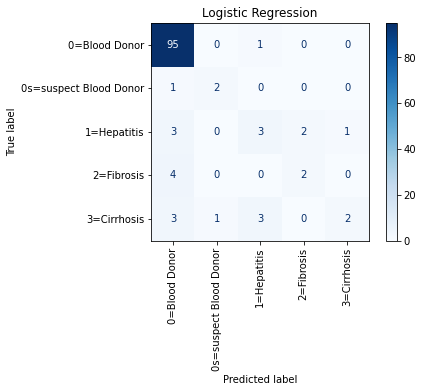

In [55]:
grid_dt_predictions = grid_dt.predict(X_test_processed)
find_metrics(y_test, grid_dt_predictions, grid_dt.best_estimator_.classes_)

In [192]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(grid_dt, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
 

Sensitivity after perturbation: 0.8292682926829268
For feature:  ALP


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8130081300813008
For feature:  ALT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8373983739837398
For feature:  AST


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8292682926829268
For feature:  BIL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8699186991869918
For feature:  CHE


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8536585365853658
For feature:  CHOL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8292682926829268
For feature:  CREA


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8455284552845529
For feature:  GGT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

Sensitivity after perturbation: 0.8211382113821138
For feature:  PROT
Sensitivity after perturbation: 0.8292682926829268


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

### C. Random Forest GridSearchCV

In [56]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],'criterion':['gini','entropy','log_loss'],
                'max_depth': [None, 10, 20, 30, 40, 50]} 
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_rf.fit(X_train_processed,y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 500}
RandomForestClassifier(criterion='entropy', n_estimators=500)


accuracy: 0.8536585365853658
precision: 0.8419310741779984
recall: 0.8536585365853658
f1score: 0.8118540994022381

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


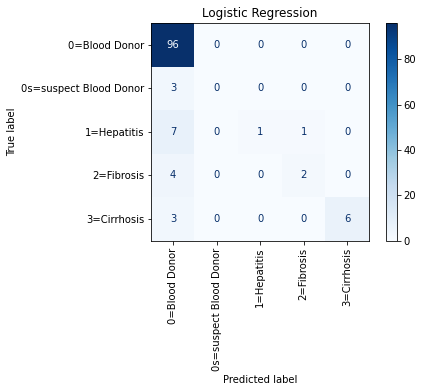

In [57]:
grid_rf_predictions = grid_rf.predict(X_test_processed)
find_metrics(y_test, grid_rf_predictions, grid_rf.best_estimator_.classes_)

In [193]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(grid_rf, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

Sensitivity after perturbation: 0.8455284552845529
For feature:  ALP


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

Sensitivity after perturbation: 0.8536585365853658
For feature:  ALT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\noury\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\noury\anaconda3\lib\site-packages

Sensitivity after perturbation: 0.8536585365853658
For feature:  AST


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

Sensitivity after perturbation: 0.8536585365853658
For feature:  BIL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\noury\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\noury\anaconda3\lib\site-packages

Sensitivity after perturbation: 0.8536585365853658
For feature:  CHE


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\noury\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\noury\anaconda3\lib\site-packages

Sensitivity after perturbation: 0.8536585365853658
For feature:  CHOL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\noury\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\noury\anaconda3\lib\site-packages

Sensitivity after perturbation: 0.8536585365853658
For feature:  CREA


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

Sensitivity after perturbation: 0.8699186991869918
For feature:  GGT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\noury\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\noury\anaconda3\lib\site-packages

Sensitivity after perturbation: 0.8617886178861789
For feature:  PROT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\noury\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\noury\anaconda3\lib\site-packages

Sensitivity after perturbation: 0.8536585365853658


### D. Stochastic Gradient Descent (SGD) GridSearchCV

In [58]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1],
              'eta0': [0.01, 0.1, 0.5, 1.0]} 

grid_sgd = GridSearchCV(SGDClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_sgd.fit(X_train_processed,y_train)
print(grid_sgd.best_params_)
print(grid_sgd.best_estimator_)

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

{'alpha': 0.001, 'eta0': 0.5, 'loss': 'hinge', 'penalty': 'l2'}
SGDClassifier(alpha=0.001, eta0=0.5)


accuracy: 0.8861788617886179
precision: 0.8816536278570334
recall: 0.8861788617886179
f1score: 0.8714307828531446

Confusion Matrix:



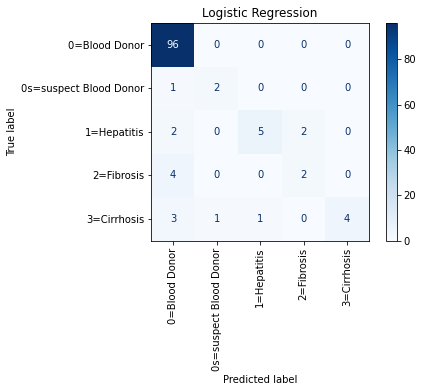

In [59]:
grid_sdg_predictions = grid_sgd.predict(X_test_processed)
find_metrics(y_test, grid_sdg_predictions, grid_sgd.best_estimator_.classes_)

In [194]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(grid_sgd, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8373983739837398
For feature:  ALP


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8699186991869918
For feature:  ALT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8699186991869918
For feature:  AST


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8699186991869918
For feature:  BIL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8861788617886179
For feature:  CHE


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8699186991869918
For feature:  CHOL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8699186991869918
For feature:  CREA


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8699186991869918
For feature:  GGT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8861788617886179
For feature:  PROT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

Sensitivity after perturbation: 0.8699186991869918


C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### E. Support Vector Machine (SVM) GridSearchCV

In [60]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid_svm.fit(X_train_processed,y_train)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


accuracy: 0.8699186991869918
precision: 0.8843205574912892
recall: 0.8699186991869918
f1score: 0.8543780936937108

Confusion Matrix:



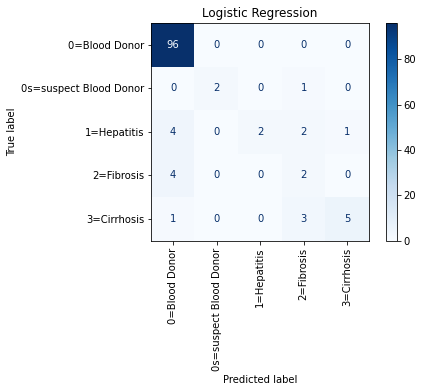

In [61]:
grid_svm_predictions = grid_svm.predict(X_test_processed)
find_metrics(y_test, grid_svm_predictions, grid_svm.best_estimator_.classes_)

In [195]:
# Sensitivity Analysis
perturbation = .5
for feature_idx in range(1, 11):
    print('For feature: ', numerical_cols[feature_idx])
    sensitivity_perturbed = calculate_sensitivity_with_perturbation(grid_svm, X_train_processed, y_train, X_test_processed, y_test, feature_idx, perturbation)

For feature:  ALB


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  ALP


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  ALT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  AST


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  BIL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  CHE


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  CHOL


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  CREA


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  GGT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918
For feature:  PROT


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Sensitivity after perturbation: 0.8699186991869918


## 6. Randomly (or based on certain hypothesis) remove some features and re-evaluate the models. Document your observations with respect to models performances.

In [62]:
from auto_feature_selector import autoFeatureSelector

In [63]:
# remove text from the target column and change the type to int
y_train_numbers = y_train.str.split("=", n=1, expand=True)[0]
y_train_numbers = [4 if n == "0s" else n for n in y_train_numbers]
numeric_y_train = pd.Series(pd.to_numeric(y_train_numbers))
autoFeatureSelector(X=X_train_processed_df, y=numeric_y_train, num_feats=7, max_number_of_features=7, methods=["pearson", "chi-square", "rfe", "log-reg", "rf", "lgbm"])

0     -0.835559
1     -0.835559
2      0.591500
3      1.101164
4     -1.447156
         ...   
487   -0.937492
488   -0.631693
489    1.203097
490    0.081836
491   -0.631693
Name: Age, Length: 492, dtype: float64 0      0
1      0
2      0
3      0
4      0
      ..
487    0
488    0
489    0
490    0
491    0
Length: 492, dtype: int64
0     -0.901069
1      0.726659
2      0.496654
3     -2.723417
4      0.125108
         ...   
487   -0.317210
488    0.532040
489   -0.334903
490    0.478961
491    0.107415
Name: ALB, Length: 492, dtype: float64 0      0
1      0
2      0
3      0
4      0
      ..
487    0
488    0
489    0
490    0
491    0
Length: 492, dtype: int64
0      0.162208
1     -0.254421
2     -0.315969
3     -0.727864
4      3.282193
         ...   
487   -0.235484
488    0.332647
489   -0.874631
490   -0.727864
491   -0.566893
Name: ALP, Length: 492, dtype: float64 0      0
1      0
2      0
3      0
4      0
      ..
487    0
488    0
489    0
490    0
491    0
Length

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

features
AST         6
CHE         5
ALB         4
ALP         4
ALT         3
BIL         3
GGT         3
dtype: int64

### based on the given results, the features (ALP and AST) are the most important with 6 votes each while the features (ALB, ALT, CHE, CREA, and PROT) are the second most important ones with 5 votes each, the following features received 4 votes each (Age, BIL, CHOL, GGT, Sex_f, and Sex_m)

### These results lead us to believe that (ALP, AST, CHE, ALB, ALT, AGE, BIL, CHOL, and CREA) are the most important while (ALP, AST, and CHE) can't be removed as they have the most significant effect, and the rest should be used as they have the second most significant effect.

In [64]:
x_test_df = pd.DataFrame(X_test_processed, columns=numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))

x_train_df_no_sex = X_train_processed_df.drop(["Sex_m", "Sex_f"], axis=1)
x_test_df_no_sex = x_test_df.drop(["Sex_m", "Sex_f"], axis=1)

x_train_df_no_sex_GGT = X_train_processed_df.drop(["Sex_m", "Sex_f", "GGT"], axis=1)
x_test_df_no_sex_GGT = x_test_df.drop(["Sex_m", "Sex_f", "GGT"], axis=1)

x_train_df_no_sex_GGT_CHOL = X_train_processed_df.drop(["Sex_m", "Sex_f", "GGT", "CHOL"], axis=1)
x_test_df_no_sex_GGT_CHOL = x_test_df.drop(["Sex_m", "Sex_f", "GGT", "CHOL"], axis=1)

x_train_df_no_sex_GGT_CHOL_BIL = X_train_processed_df.drop(["Sex_m", "Sex_f", "GGT", "CHOL", "BIL"], axis=1)
x_test_df_no_sex_GGT_CHOL_BIL = x_test_df.drop(["Sex_m", "Sex_f", "GGT", "CHOL", "BIL"], axis=1)

### 6.A. Training the models without using the columns "sex_m" and "sex_f"

#### Logistic Regression Model


C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=50)
Accuracy: 0.8861788617886179

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

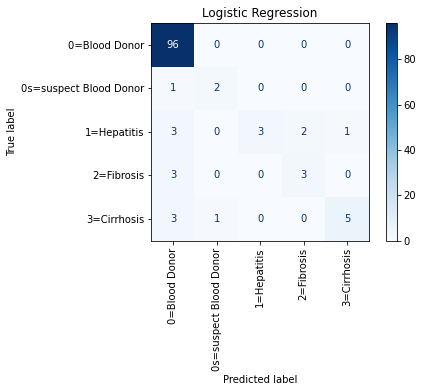

In [65]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200, 500],'penalty': ['l1', 'l2']} 
grid_log = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid_log.fit(x_train_df_no_sex,y_train)
print(grid_log.best_params_)
print(grid_log.best_estimator_)
grid_log_predictions = grid_log.predict(x_test_df_no_sex)

# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_log_predictions)
print("Accuracy:", accuracy)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_log_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_log.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

#### Decision Tree Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=5, min_samples_split=10)
Accuracy: 0.8211382113821138

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

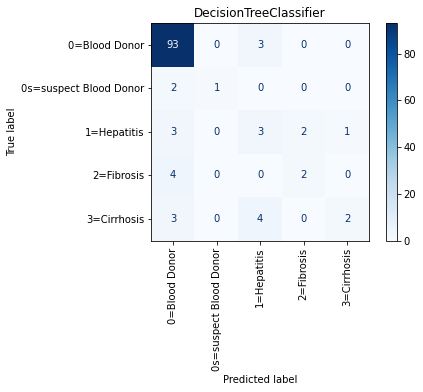

In [66]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]} 


grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, refit=True, verbose=0)
grid_dt.fit(x_train_df_no_sex, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)
grid_dt_predictions = grid_dt.predict(x_test_df_no_sex)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_dt_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_dt_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_dt.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("DecisionTreeClassifier")
plt.show()

#### Random Forest Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 500}
RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=500)
Accuracy: 0.8617886178861789

Confusion Matrix:



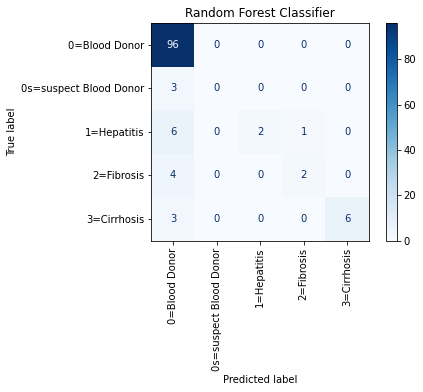

In [67]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],'criterion':['gini','entropy','log_loss'],
                'max_depth': [None, 10, 20, 30, 40, 50]} 
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_rf.fit(x_train_df_no_sex,y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)
grid_rf_predictions = grid_rf.predict(x_test_df_no_sex)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_rf_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_rf_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest Classifier")
plt.show()

#### Stochastic Gradient Descent Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

{'alpha': 0.0001, 'eta0': 1.0, 'loss': 'perceptron', 'penalty': 'elasticnet'}
SGDClassifier(eta0=1.0, loss='perceptron', penalty='elasticnet')
Accuracy: 0.8699186991869918

Confusion Matrix:



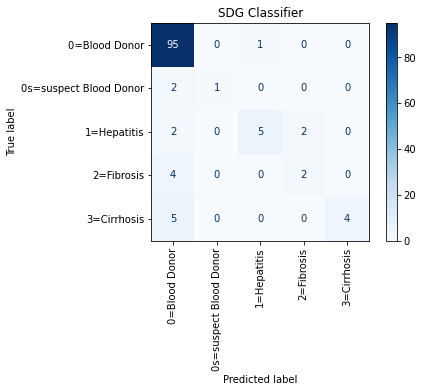

In [68]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1],
              'eta0': [0.01, 0.1, 0.5, 1.0]} 

grid_sgd = GridSearchCV(SGDClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_sgd.fit(x_train_df_no_sex,y_train)
print(grid_sgd.best_params_)
print(grid_sgd.best_estimator_)
grid_sdg_predictions = grid_sgd.predict(x_test_df_no_sex)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_sdg_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_sdg_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_sgd.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("SDG Classifier")
plt.show()

#### Support Vector Machine Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)
Accuracy: 0.8943089430894309

Confusion Matrix:



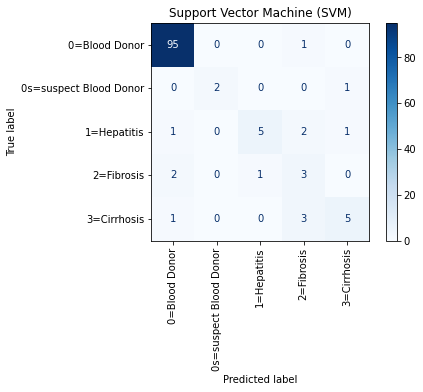

In [69]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid_svm.fit(x_train_df_no_sex,y_train)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)
grid_svm_predictions = grid_svm.predict(x_test_df_no_sex)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_svm_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_svm_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_svm.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()

### 6.B. Training the models without using the columns "sex_m", "sex_f" and "GGT"

#### Logistic Regression Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=50)
Accuracy: 0.8455284552845529

Confusion Matrix:



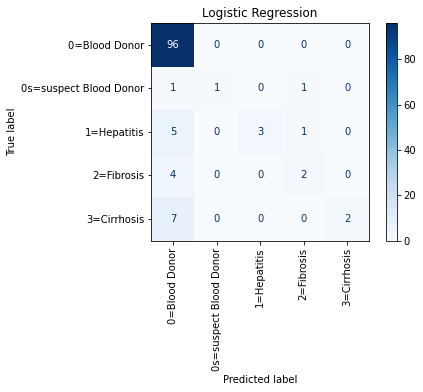

In [70]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200, 500],'penalty': ['l1', 'l2']} 
grid_log = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid_log.fit(x_train_df_no_sex_GGT,y_train)
print(grid_log.best_params_)
print(grid_log.best_estimator_)
grid_log_predictions = grid_log.predict(x_test_df_no_sex_GGT)

# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_log_predictions)
print("Accuracy:", accuracy)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_log_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_log.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

#### Decision Tree Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
 

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=5, min_samples_split=5)
Accuracy: 0.8211382113821138

Confusion Matrix:



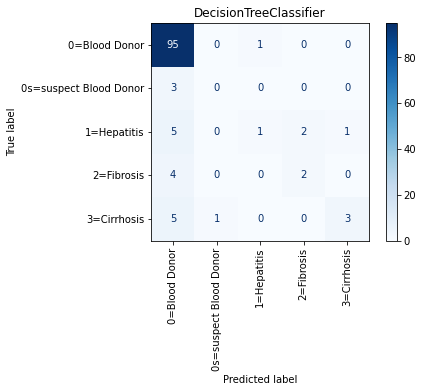

In [71]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]} 


grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, refit=True, verbose=0)
grid_dt.fit(x_train_df_no_sex_GGT, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)
grid_dt_predictions = grid_dt.predict(x_test_df_no_sex_GGT)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_dt_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_dt_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_dt.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("DecisionTreeClassifier")
plt.show()

#### Random Forest Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 300}
RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300)
Accuracy: 0.8780487804878049

Confusion Matrix:



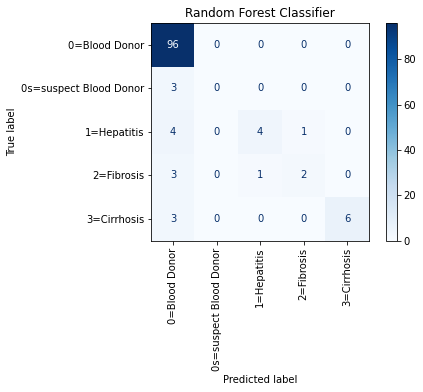

In [72]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],'criterion':['gini','entropy','log_loss'],
                'max_depth': [None, 10, 20, 30, 40, 50]} 
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_rf.fit(x_train_df_no_sex_GGT,y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)
grid_rf_predictions = grid_rf.predict(x_test_df_no_sex_GGT)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_rf_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_rf_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest Classifier")
plt.show()

#### Stochastic Gradient Descent Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

{'alpha': 0.0001, 'eta0': 0.01, 'loss': 'log', 'penalty': 'l1'}
SGDClassifier(eta0=0.01, loss='log', penalty='l1')
Accuracy: 0.8780487804878049

Confusion Matrix:



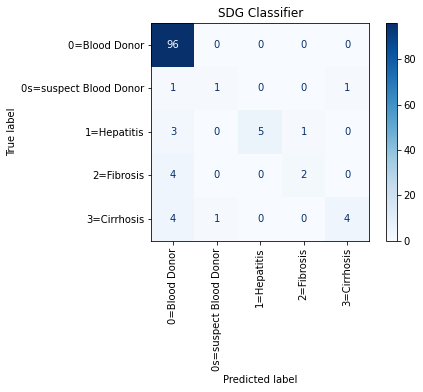

In [73]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1],
              'eta0': [0.01, 0.1, 0.5, 1.0]} 

grid_sgd = GridSearchCV(SGDClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_sgd.fit(x_train_df_no_sex_GGT,y_train)
print(grid_sgd.best_params_)
print(grid_sgd.best_estimator_)
grid_sdg_predictions = grid_sgd.predict(x_test_df_no_sex_GGT)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_sdg_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_sdg_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_sgd.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("SDG Classifier")
plt.show()

#### Support Vector Machine Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
Accuracy: 0.8373983739837398

Confusion Matrix:



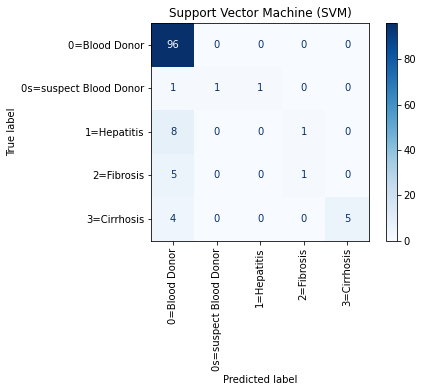

In [74]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid_svm.fit(x_train_df_no_sex_GGT,y_train)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)
grid_svm_predictions = grid_svm.predict(x_test_df_no_sex_GGT)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_svm_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_svm_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_svm.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()

### 6.C. Training the models without using the columns "sex_m", "sex_f", "GGT" and "CHOL"

#### Logistic Regression Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=50)
Accuracy: 0.8536585365853658

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

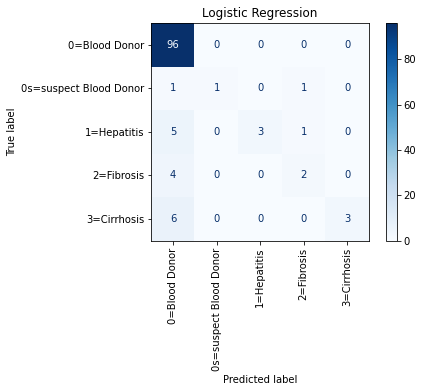

In [75]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200, 500],'penalty': ['l1', 'l2']} 
grid_log = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid_log.fit(x_train_df_no_sex_GGT_CHOL,y_train)
print(grid_log.best_params_)
print(grid_log.best_estimator_)
grid_log_predictions = grid_log.predict(x_test_df_no_sex_GGT_CHOL)

# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_log_predictions)
print("Accuracy:", accuracy)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_log_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_log.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

#### Decision Tree Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=7, min_samples_split=5)
Accuracy: 0.8292682926829268

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

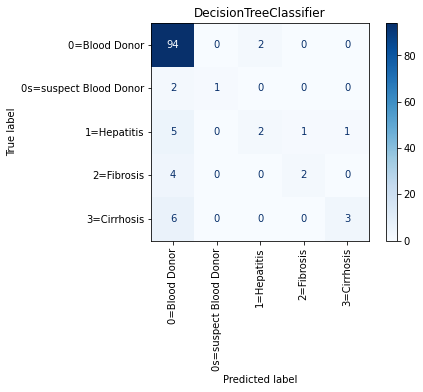

In [76]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]} 


grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, refit=True, verbose=0)
grid_dt.fit(x_train_df_no_sex_GGT_CHOL, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)
grid_dt_predictions = grid_dt.predict(x_test_df_no_sex_GGT_CHOL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_dt_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_dt_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_dt.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("DecisionTreeClassifier")
plt.show()

#### Random Forest Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 400}
RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=400)
Accuracy: 0.8699186991869918

Confusion Matrix:



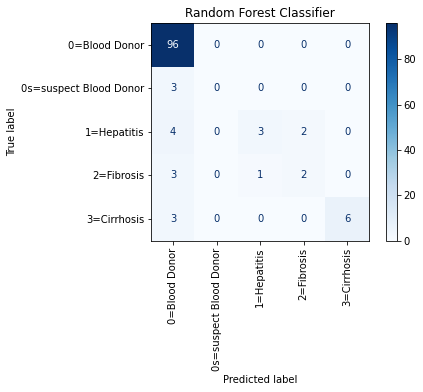

In [77]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],'criterion':['gini','entropy','log_loss'],
                'max_depth': [None, 10, 20, 30, 40, 50]} 
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_rf.fit(x_train_df_no_sex_GGT_CHOL,y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)
grid_rf_predictions = grid_rf.predict(x_test_df_no_sex_GGT_CHOL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_rf_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_rf_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest Classifier")
plt.show()

#### Stochastic Gradient Descent Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

{'alpha': 0.001, 'eta0': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
SGDClassifier(alpha=0.001, eta0=0.01)
Accuracy: 0.8292682926829268

Confusion Matrix:



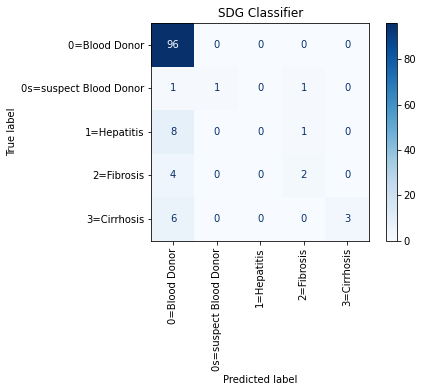

In [78]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1],
              'eta0': [0.01, 0.1, 0.5, 1.0]} 

grid_sgd = GridSearchCV(SGDClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_sgd.fit(x_train_df_no_sex_GGT_CHOL,y_train)
print(grid_sgd.best_params_)
print(grid_sgd.best_estimator_)
grid_sdg_predictions = grid_sgd.predict(x_test_df_no_sex_GGT_CHOL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_sdg_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_sdg_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_sgd.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("SDG Classifier")
plt.show()

#### Support Vector Machine Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)
Accuracy: 0.8861788617886179

Confusion Matrix:



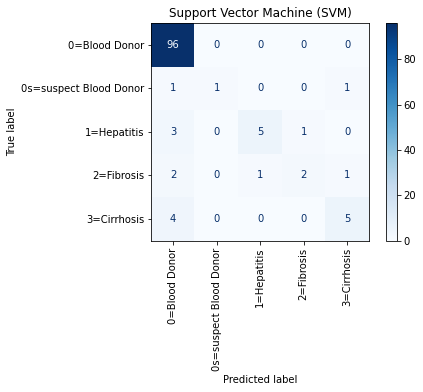

In [79]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid_svm.fit(x_train_df_no_sex_GGT_CHOL,y_train)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)
grid_svm_predictions = grid_svm.predict(x_test_df_no_sex_GGT_CHOL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_svm_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_svm_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_svm.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()

### 6.D. Training the models without using the columns "sex_m", "sex_f", "GGT", "CHOL" and "BIL"

#### Linear Regression Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=50)
Accuracy: 0.8699186991869918

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

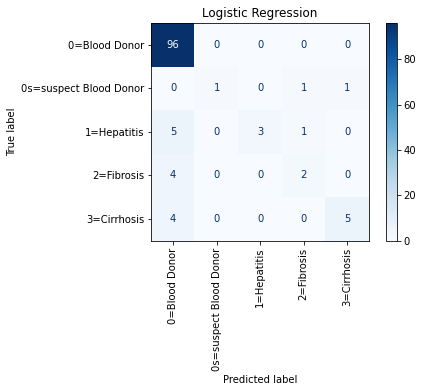

In [80]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200, 500],'penalty': ['l1', 'l2']} 
grid_log = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid_log.fit(x_train_df_no_sex_GGT_CHOL_BIL,y_train)
print(grid_log.best_params_)
print(grid_log.best_estimator_)
grid_log_predictions = grid_log.predict(x_test_df_no_sex_GGT_CHOL_BIL)

# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_log_predictions)
print("Accuracy:", accuracy)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_log_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_log.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

#### Decision Tree Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=10, min_samples_split=5)
Accuracy: 0.8373983739837398

Confusion Matrix:



C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

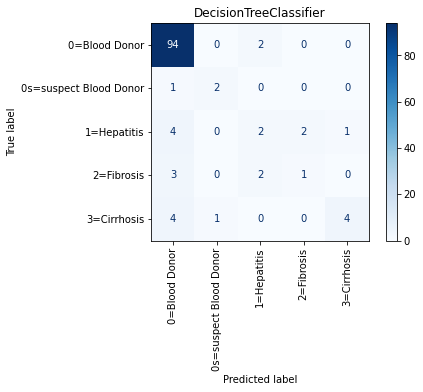

In [81]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]} 


grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, refit=True, verbose=0)
grid_dt.fit(x_train_df_no_sex_GGT_CHOL_BIL, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)
grid_dt_predictions = grid_dt.predict(x_test_df_no_sex_GGT_CHOL_BIL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_dt_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_dt_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_dt.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("DecisionTreeClassifier")
plt.show()

#### Random Forest Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noury\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Par

{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 100}
RandomForestClassifier(max_depth=40)
Accuracy: 0.8455284552845529

Confusion Matrix:



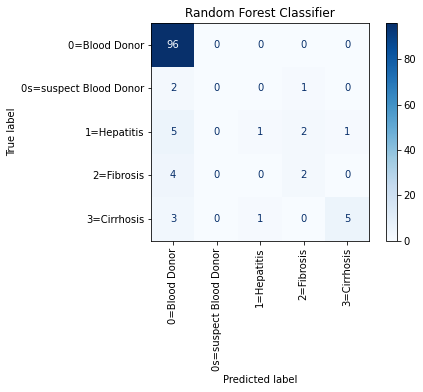

In [82]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],'criterion':['gini','entropy','log_loss'],
                'max_depth': [None, 10, 20, 30, 40, 50]} 
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_rf.fit(x_train_df_no_sex_GGT_CHOL_BIL,y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)
grid_rf_predictions = grid_rf.predict(x_test_df_no_sex_GGT_CHOL_BIL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_rf_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_rf_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest Classifier")
plt.show()

#### Stochastic Gradient Descent Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: Converge

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noury\anaconda3\lib\site-packages\sklearn\linear_mo

{'alpha': 0.01, 'eta0': 1.0, 'loss': 'modified_huber', 'penalty': 'l1'}
SGDClassifier(alpha=0.01, eta0=1.0, loss='modified_huber', penalty='l1')
Accuracy: 0.8373983739837398

Confusion Matrix:



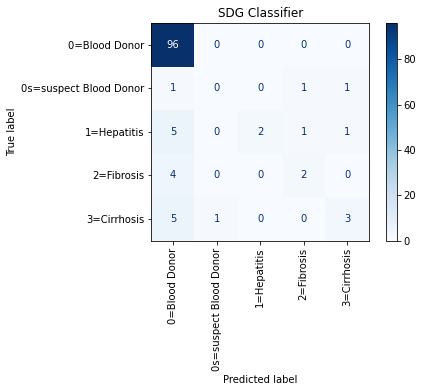

In [83]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1],
              'eta0': [0.01, 0.1, 0.5, 1.0]} 

grid_sgd = GridSearchCV(SGDClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_sgd.fit(x_train_df_no_sex_GGT_CHOL_BIL,y_train)
print(grid_sgd.best_params_)
print(grid_sgd.best_estimator_)
grid_sdg_predictions = grid_sgd.predict(x_test_df_no_sex_GGT_CHOL_BIL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_sdg_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_sdg_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_sgd.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("SDG Classifier")
plt.show()

#### Support Vector Machine Model

C:\Users\noury\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
Accuracy: 0.8536585365853658

Confusion Matrix:



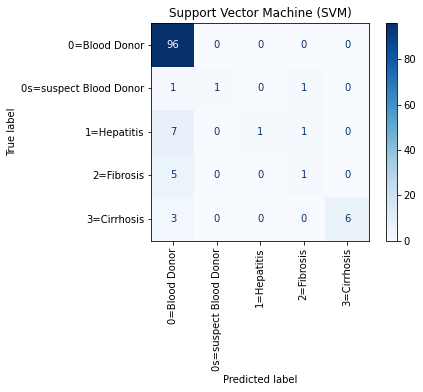

In [84]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid_svm.fit(x_train_df_no_sex_GGT_CHOL_BIL,y_train)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)
grid_svm_predictions = grid_svm.predict(x_test_df_no_sex_GGT_CHOL_BIL)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_svm_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_svm_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_svm.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()